In [1]:
%matplotlib nbagg
import h5py as h5
import hyperspy.api as hs
import numpy as np

# switch of the too many warnings...
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load data from file
f=h5.File('cltestpm.h5','r')

original shape : (1, 1, 1, 728, 512)
hyperspy shape : (728, 512)


<IPython.core.display.Javascript object>


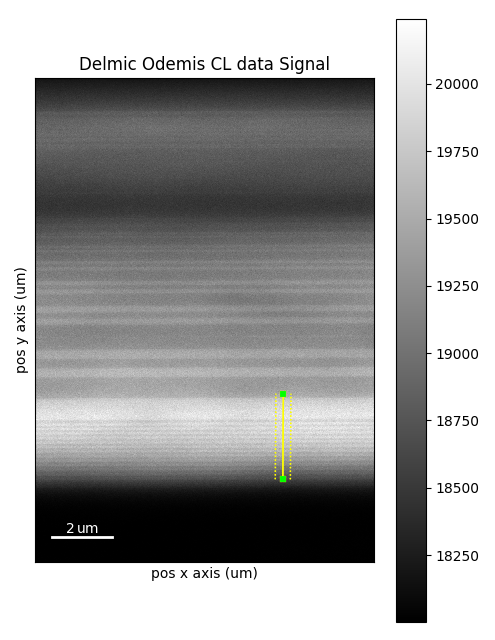

<IPython.core.display.Javascript object>


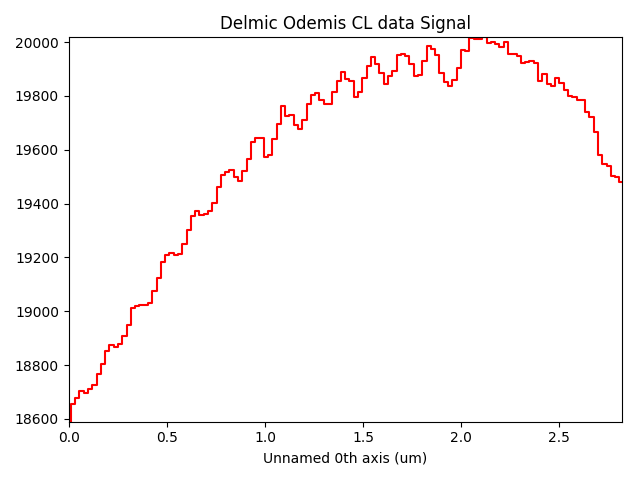

In [6]:

shome = 'Acquisition2//ImageData/'
x = f[shome + 'Image']
type(x)
print('original shape :' ,x.shape)
# strip unused dimensions and transpose/ reverse index order
#xx=x[:,0,0,:,:].transpose((2,1,0))
xx=x[0,0,0,:,:]



# create a hyperspy object...

# in hyperspy the spectral data is '1D' with 2 navigation axes !
s = hs.signals.Signal2D(xx)
print('hyperspy shape :' ,s.data.shape)


s.metadata.General.title = 'Delmic Odemis CL data'
s.axes_manager[0].name = 'pos x'
s.axes_manager[0].scale = f[shome + 'DimensionScaleX'].value * 1e6
#s.axes_manager[0].offset = f[shome + 'XOffset'].value * 1e6
s.axes_manager[0].units = 'um'


s.axes_manager[1].name = 'pos y'
s.axes_manager[1].scale = f[shome + 'DimensionScaleX'].value * 1e6
#s.axes_manager[1].offset = f[shome + 'YOffset'].value * 1e6
s.axes_manager[1].units = 'um'

s.metadata.signal_type = 'CL'


#s.remove_background()

# the standard data mapper gives us an CL (integrated) image to navigate
# a spectrum is shown for each pixel



line_roi = hs.roi.Line2DROI(0.43, 0.88,4,0.54, 0.1)

line_roi.gui()
s.plot()
s.axes_manager.gui_navigation_sliders()



roi1D = line_roi.interactive(s, color="yellow")
roi1D.plot()


#s.plot()
#s.axes_manager.gui_navigation_sliders()



#s.save('cltest.hspy')






<IPython.core.display.Javascript object>


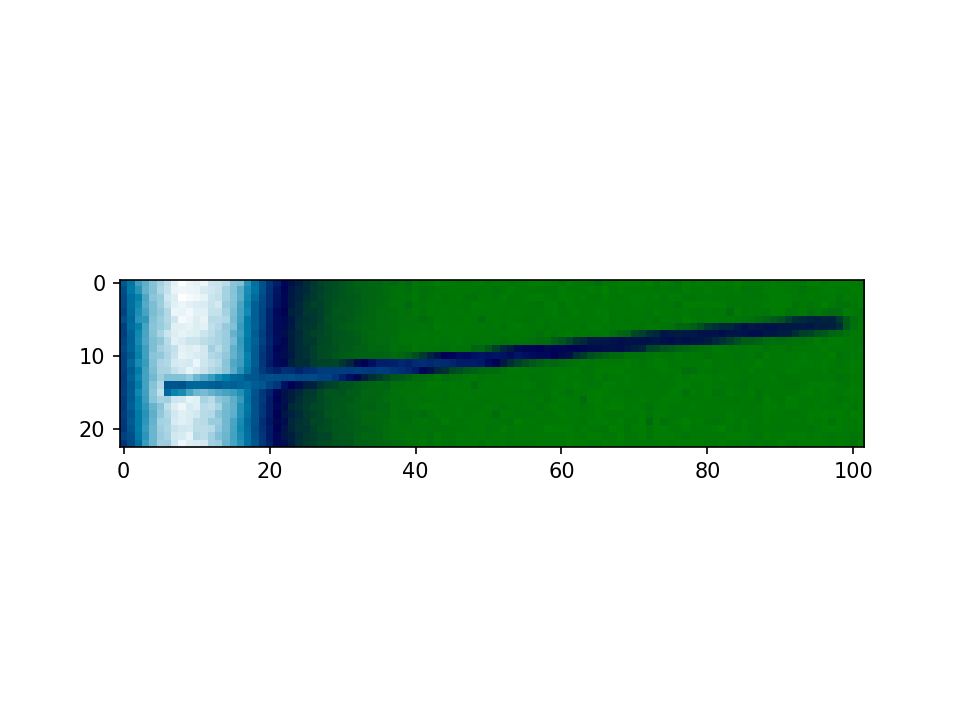

coordinates:  (881.2420474442258,)


<IPython.core.display.Javascript object>


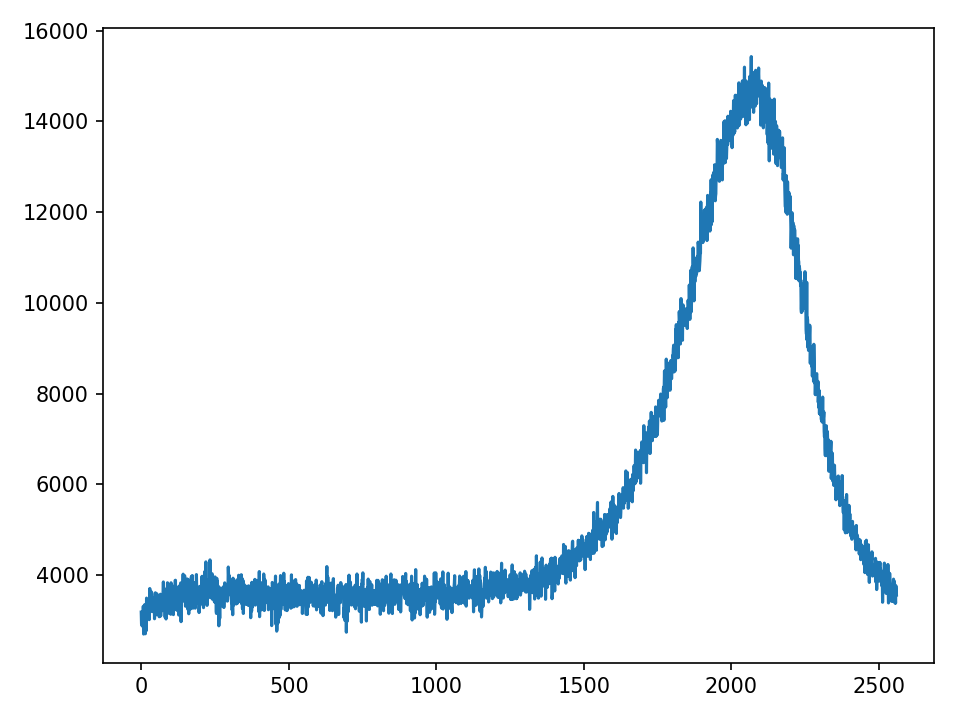

coordinates:  (0.14638844301765677, 0.32022471910112293)


In [58]:
import matplotlib.pyplot as plt

#access the data selected with the cursors in the previous cell:

k = s2.axes_manager.indices[0]
y = s2.data[k,:,:]
plt.figure()
plt.imshow(y, interpolation='nearest', cmap=plt.cm.ocean)
plt.show()
wk = s2.axes_manager.coordinates
print('coordinates: ', wk)

k,l = s.axes_manager.indices
y = s.data[k,l,:]
plt.figure()
plt.plot(y)
plt.show()
wk = s.axes_manager.coordinates
print('coordinates: ', wk)


In [60]:
?s.plot